# RAINFALL PREDICTION IN THANH HOA(VIET NAM) - DATASET 1


by Nguyen Dinh Chinh - 20021307

In [1]:
#import library
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import statsmodels.api as sm
from sklearn import preprocessing, impute
from sklearn.model_selection import cross_validate as cv
from pandas import DataFrame
from pandas import concat
from datetime import datetime
import joblib
%matplotlib inline

from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

import tensorflow as tf
import os
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import *
from sklearn.metrics import mean_squared_error as mse
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.metrics import r2_score
from tensorflow.keras.optimizers import Adam

In [2]:
# Dataset 1
#Load data
data9 = pd.read_excel('Data/data_match9.xlsx', engine='openpyxl')
data10 = pd.read_excel('Data/data_match10.xlsx', engine='openpyxl')
#Concatenating DataFrames
data = pd.concat([data9, data10], axis=0)

## Exploring data

### Statistics of variables

In [74]:
data.head()

,id,name,lat,lon,value,datetime,B04B,B05B,B06B,B09B,...,I2B,I4B,IRB,VSB,WVB,CAPE,TCC,TCW,TCWV,IMERG
0,116673,TanTruong,19.370885,105.654165,2.4,2019-09-01 00:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25.2500,1.000003,64.852661,64.672195,0.151356
1,116673,TanTruong,19.370885,105.654165,0.0,2019-09-01 07:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,178.1875,1.000002,69.277817,68.070160,3.767498
2,116673,TanTruong,19.370885,105.654165,0.0,2019-09-01 08:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,98.2500,0.999998,68.917984,67.623199,3.938313
3,116673,TanTruong,19.370885,105.654165,0.0,2019-09-01 09:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,100.6875,1.000001,69.386337,68.394302,6.779099
4,116673,TanTruong,19.370885,105.654165,0.0,2019-09-01 10:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,103.3750,1.000004,69.258972,68.883392,11.281171


In [3]:
data.drop(columns = ["name", "lat", "lon"], inplace = True)
data.describe(include=np.number)

,value,B04B,B05B,B06B,B09B,B10B,B11B,B12B,B14B,B16B,I2B,I4B,IRB,VSB,WVB,CAPE,TCC,TCW,TCWV,IMERG
count,180518.000000,171766.000000,171766.000000,171766.000000,171766.000000,171766.000000,171766.000000,171766.000000,171766.000000,171766.000000,171766.000000,171766.000000,171766.000000,171154.000000,171154.000000,176953.000000,176953.000000,176953.000000,176953.000000,180518.000000
mean,0.387904,0.133540,0.077556,0.050540,243.502103,250.592091,274.064079,256.134847,274.628023,260.324232,271.936995,283.350739,275.968026,0.088642,234.835579,513.735719,0.598203,45.496486,45.196144,0.960500
std,2.397454,0.187717,0.109586,0.077957,14.899867,18.556099,24.904239,16.909618,25.495011,20.991708,24.779519,21.914715,24.972113,0.152033,12.631280,790.716142,0.365685,10.696034,10.338895,4.305190
min,0.000000,0.000000,0.000000,0.000000,102.969421,0.000000,0.000000,108.106400,102.687599,102.958733,101.696297,108.100006,103.016319,0.000000,103.262726,0.000000,0.000000,12.393962,12.391813,0.000000
25%,0.000000,0.000000,0.000000,0.000000,242.323166,249.953152,269.419724,253.358822,267.970413,256.899040,266.061417,278.533875,270.148064,0.000000,233.463367,18.625000,0.240662,37.741257,37.649521,0.000000
50%,0.000000,0.002344,0.001302,0.001133,248.047241,256.707825,284.037796,262.912018,285.626617,269.646912,282.561310,290.480652,286.580933,0.001953,238.242348,169.187500,0.658529,45.551437,45.355362,0.000000
75%,0.000000,0.250186,0.148750,0.079585,251.273190,259.683624,288.887268,265.999298,290.813080,272.564087,287.231873,295.951935,291.622902,0.106726,241.200607,669.687500,0.985042,53.084641,52.795776,0.000000
max,87.000000,0.924143,0.581414,0.397904,259.936646,267.162018,300.364532,273.108063,303.339874,279.133881,298.516541,309.721527,303.998779,0.912455,249.843307,8496.551758,1.000008,88.392822,73.954330,106.250961


### Visualizing data

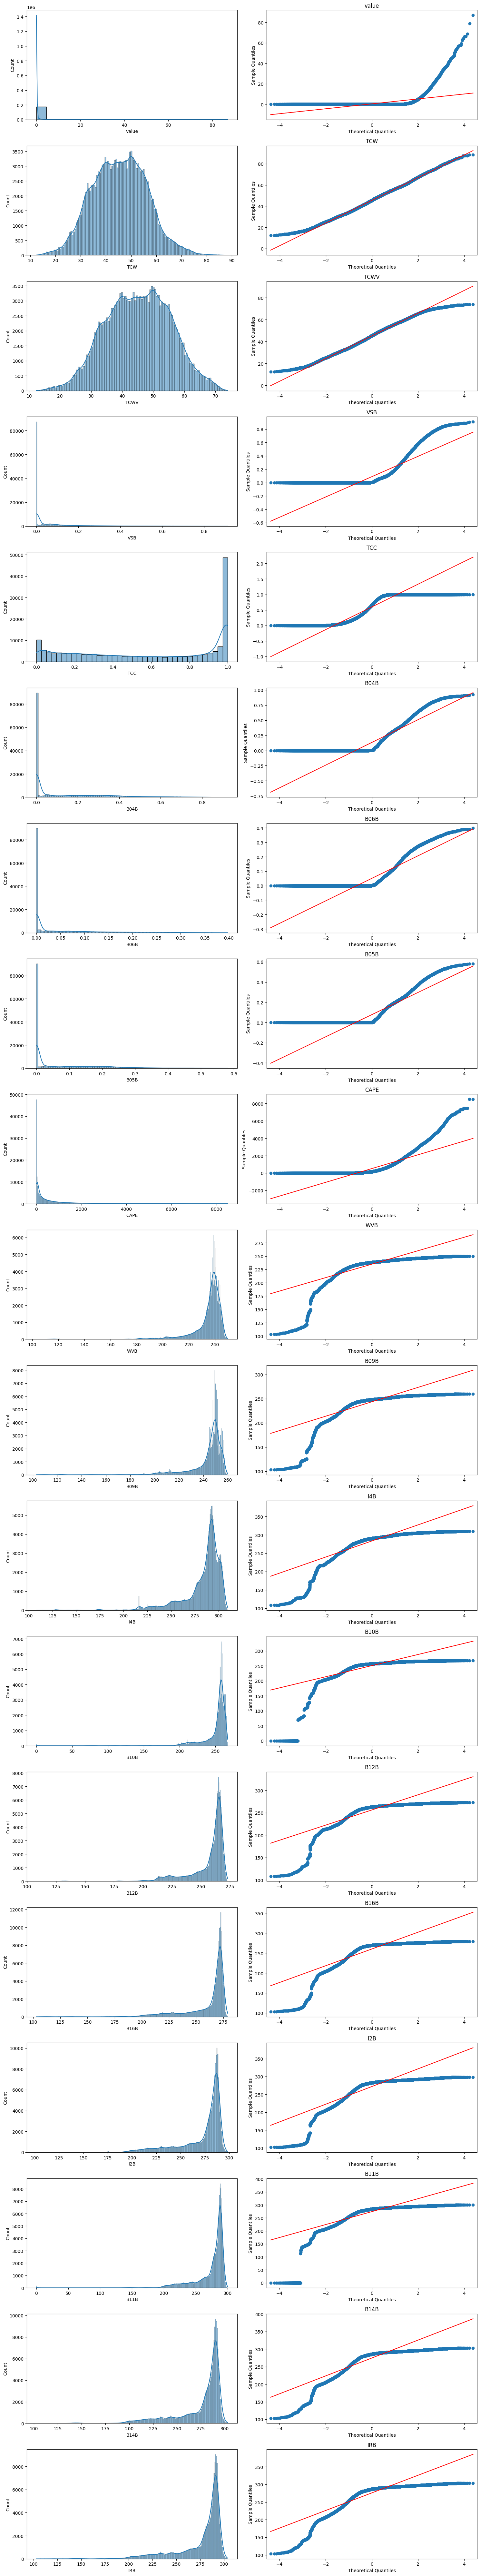

In [18]:
num_col = ['value','TCW','TCWV', 'VSB','TCC','B04B','B06B','B05B','CAPE','WVB','B09B','I4B','B10B','B12B','B16B','I2B',
           'B11B','B14B','IRB']
fig,axes = plt.subplots(len(num_col),2,figsize=(15, len(data.columns)*4))
for i, col in enumerate(num_col):
    sns.histplot(data[col], ax = axes[i,0],kde =True)
    sm.qqplot(data[col].dropna(),line = "s",fmt = "b",ax = axes[i,1])
    axes[i, 1].set_title(col)

plt.tight_layout()
plt.show()

In [5]:
num_col = ['value','TCW','TCWV', 'VSB','TCC','B04B','B06B','B05B','CAPE','WVB','B09B','I4B','B10B','B12B','B16B','I2B',
           'B11B','B14B','IRB']
def scale_data(X):
    inv_sigmoid = lambda x: np.log(x / (1-x))
    
    X = X.copy()
    for col in num_col:
        X[col] = preprocessing.minmax_scale(X[col], feature_range=(0+1e-6, 1-1e-6))
        X[col] = X[col].apply(inv_sigmoid)
    X[num_col] = preprocessing.power_transform(X[num_col])
    #X['loudness'] = X['loudness'].apply(lambda x: np.log1p(-x))
    return X
df_scaled = scale_data(data)

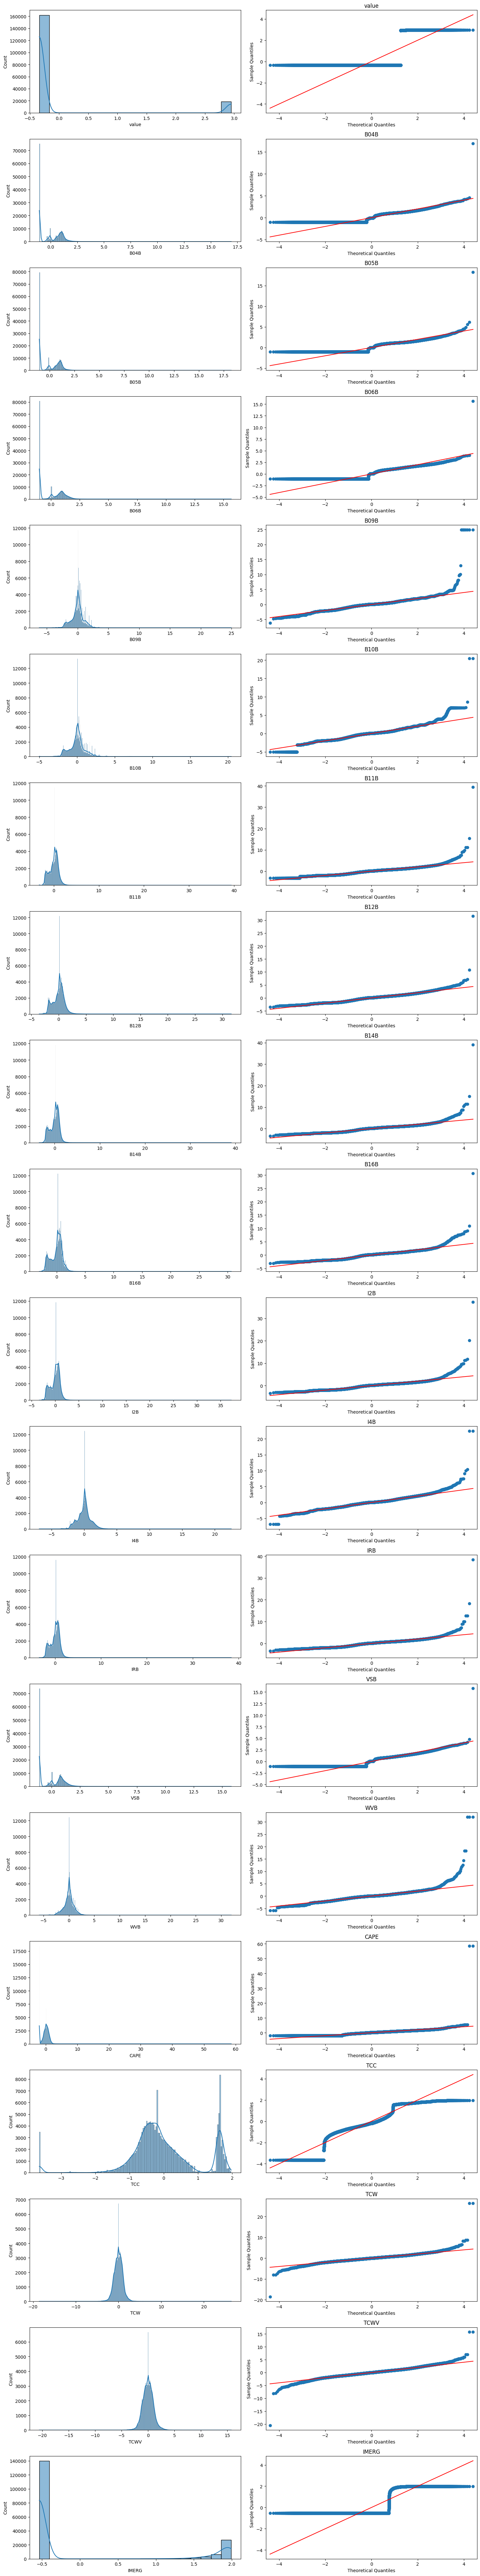

In [26]:
fig,axes = plt.subplots(len(num_col),2,figsize=(15, len(data.columns)*4))
for i, col in enumerate(num_col):
    sns.histplot(df_scaled[col], ax = axes[i,0],kde =True)
    sm.qqplot(df_scaled[col].dropna(),line = "s",fmt = "b",ax = axes[i,1])
    axes[i, 1].set_title(col)

plt.tight_layout()
plt.show()

### " Value" Target

Consider the statistics of variable "value" in the data set

<AxesSubplot: xlabel='value', ylabel='Density'>

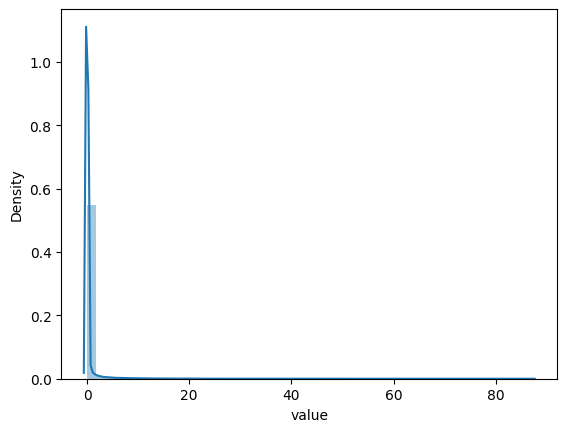

In [236]:
sns.distplot(data['value'],kde=True)

In [237]:
data["value"].describe()

count    180518.000000
mean          0.387904
std           2.397454
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          87.000000
Name: value, dtype: float64

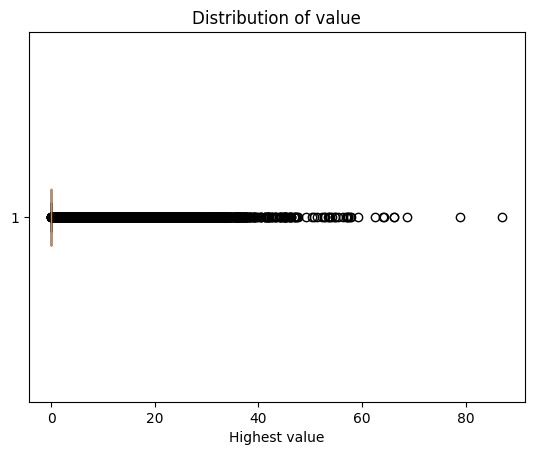

In [238]:
# Use a horizontal boxplot to check for outliers in the 'B04B' column:
plt.boxplot(data["value"], vert = False)
plt.xlabel("Highest value")
plt.title("Distribution of value");

Consider the correlation of variable "value" with the rest of the variables in the data set

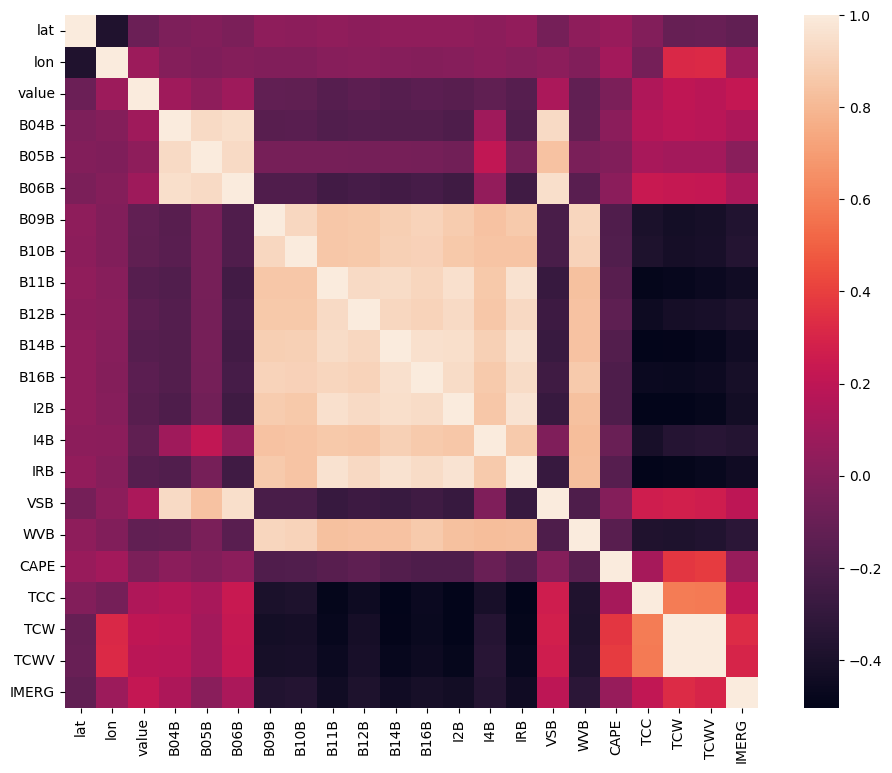

In [239]:
# Correlation matrix.
# Shows the relationship between the variables:
corrmatrix = data.corr(numeric_only = True)
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmatrix, vmax = 1.0, square = True)
plt.show()

In [240]:
#Feature Interactions:
numeric_features = data.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print(corr['value'].sort_values(ascending = False), '\n')

value    1.000000
IMERG    0.222464
TCW      0.202319
TCWV     0.187729
TCC      0.141887
VSB      0.135400
B04B     0.091156
B06B     0.086701
lon      0.078975
B05B     0.030260
CAPE    -0.030943
lat     -0.092746
WVB     -0.123428
B09B    -0.127885
B10B    -0.129671
I4B     -0.130735
B12B    -0.145775
B16B    -0.152312
I2B     -0.161598
B11B    -0.164254
B14B    -0.165426
IRB     -0.168103
Name: value, dtype: float64 



## Data Preparation

In [100]:
# Perform feature selection:
data.drop(columns = ["name", "lat", "lon"], inplace = True)

#### outliers handling

In [6]:
from sklearn.base import BaseEstimator, TransformerMixin
class ZscoreOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, z_threshold: float = 3):
        self.z_threshold = z_threshold
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        mean = X.mean()
        std = X.std()
        self.lower = mean - self.z_threshold * std
        self.upper = mean + self.z_threshold * std
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

In [26]:
col = ['TCW','TCWV', 'VSB','TCC','B04B','B06B','B05B','CAPE','WVB','B09B','I4B','B10B','B12B','B16B','I2B',
           'B11B','B14B','IRB']
clipped_total_rooms2 = ZscoreOutlierClipper().fit_transform(data["TCW"])
clipped_total_rooms3 = ZscoreOutlierClipper().fit_transform(data["TCWV"])
clipped_total_rooms4 = ZscoreOutlierClipper().fit_transform(data["VSB"])
clipped_total_rooms5 = ZscoreOutlierClipper().fit_transform(data["TCC"])
clipped_total_rooms6 = ZscoreOutlierClipper().fit_transform(data["B04B"])
clipped_total_rooms7 = ZscoreOutlierClipper().fit_transform(data["B06B"])
clipped_total_rooms8 = ZscoreOutlierClipper().fit_transform(data["B05B"])
clipped_total_rooms9 = ZscoreOutlierClipper().fit_transform(data["CAPE"])
clipped_total_rooms10 = ZscoreOutlierClipper().fit_transform(data["WVB"])
clipped_total_rooms11 = ZscoreOutlierClipper().fit_transform(data["B09B"])
clipped_total_rooms12 = ZscoreOutlierClipper().fit_transform(data["I4B"])
clipped_total_rooms13 = ZscoreOutlierClipper().fit_transform(data["B10B"])
clipped_total_rooms14 = ZscoreOutlierClipper().fit_transform(data["B12B"])
clipped_total_rooms15 = ZscoreOutlierClipper().fit_transform(data["B16B"])
clipped_total_rooms16 = ZscoreOutlierClipper().fit_transform(data["I2B"])
clipped_total_rooms17 = ZscoreOutlierClipper().fit_transform(data["B11B"])
clipped_total_rooms18 = ZscoreOutlierClipper().fit_transform(data["B14B"])
clipped_total_rooms19 = ZscoreOutlierClipper().fit_transform(data["IRB"])
clipped_total_rooms19 = ZscoreOutlierClipper().fit_transform(data["value"])

In [27]:
#Data shape
print(data9.shape)
print(data10.shape)
print(data.shape)

(94914, 25)
(85604, 25)
(180518, 20)


In [9]:
#Checking the missing value in data9
data.isnull().sum()
# data9.isnull().sum()


id          1329
value          0
datetime       0
B04B        8752
B05B        8752
B06B        8752
B09B        8752
B10B        8752
B11B        8752
B12B        8752
B14B        8752
B16B        8752
I2B         8752
I4B         8752
IRB         8752
VSB         9364
WVB         9364
CAPE        3565
TCC         3565
TCW         3565
TCWV        3565
IMERG          0
dtype: int64

In [12]:
num_col = [col for col in data.columns if data[col].dtypes !='O']
num_col
# data.drop(columns = ["id"], inplace = True)
#The null values of each numerical columns will be replace with a average number of that column
data[num_col] = data[num_col].fillna(data[num_col].median())

In [13]:
#Data shape
print(data.shape)
data.head(10)

(180518, 20)


,value,B04B,B05B,B06B,B09B,B10B,B11B,B12B,B14B,B16B,I2B,I4B,IRB,VSB,WVB,CAPE,TCC,TCW,TCWV,IMERG
0,2.4,0.002344,0.001302,0.001133,248.047241,256.707825,284.037796,262.912018,285.626617,269.646912,282.56131,290.480652,286.580933,0.001953,238.242348,25.2500,1.000003,64.852661,64.672195,0.151356
1,0.0,0.002344,0.001302,0.001133,248.047241,256.707825,284.037796,262.912018,285.626617,269.646912,282.56131,290.480652,286.580933,0.001953,238.242348,178.1875,1.000002,69.277817,68.070160,3.767498
2,0.0,0.002344,0.001302,0.001133,248.047241,256.707825,284.037796,262.912018,285.626617,269.646912,282.56131,290.480652,286.580933,0.001953,238.242348,98.2500,0.999998,68.917984,67.623199,3.938313
3,0.0,0.002344,0.001302,0.001133,248.047241,256.707825,284.037796,262.912018,285.626617,269.646912,282.56131,290.480652,286.580933,0.001953,238.242348,100.6875,1.000001,69.386337,68.394302,6.779099
4,0.0,0.002344,0.001302,0.001133,248.047241,256.707825,284.037796,262.912018,285.626617,269.646912,282.56131,290.480652,286.580933,0.001953,238.242348,103.3750,1.000004,69.258972,68.883392,11.281171
5,0.0,0.002344,0.001302,0.001133,248.047241,256.707825,284.037796,262.912018,285.626617,269.646912,282.56131,290.480652,286.580933,0.001953,238.242348,96.8125,0.999997,68.347580,67.970245,5.294654
6,0.0,0.002344,0.001302,0.001133,248.047241,256.707825,284.037796,262.912018,285.626617,269.646912,282.56131,290.480652,286.580933,0.001953,238.242348,46.3125,0.999999,68.599884,67.933868,1.357217
7,0.6,0.002344,0.001302,0.001133,248.047241,256.707825,284.037796,262.912018,285.626617,269.646912,282.56131,290.480652,286.580933,0.001953,238.242348,72.0625,1.000002,68.006592,67.424759,0.214589
8,0.0,0.002344,0.001302,0.001133,248.047241,256.707825,284.037796,262.912018,285.626617,269.646912,282.56131,290.480652,286.580933,0.001953,238.242348,80.2500,0.994665,68.474686,67.373093,0.173961
9,0.0,0.002344,0.001302,0.001133,248.047241,256.707825,284.037796,262.912018,285.626617,269.646912,282.56131,290.480652,286.580933,0.001953,238.242348,109.1875,1.000003,69.411636,68.121536,1.694707


### Training, Validation & Test Splitting Data( MLR & RANDOM FOREST)

In [28]:
# The independent variables:
input_ds = data.drop(columns = ["value","IMERG"])
# The dependent variable:
output_ds = data["value"]

# split data into training, validation, and test data (features and labels, x and y)
train_x,test_x,train_y,test_y = train_test_split(input_ds, output_ds, test_size = 0.2)

# print out the shapes of your resultant feature data
print((train_x.shape),(test_x.shape),)

(144414, 18) (36104, 18)


In [29]:
input_ds.head(10)

,B04B,B05B,B06B,B09B,B10B,B11B,B12B,B14B,B16B,I2B,I4B,IRB,VSB,WVB,CAPE,TCC,TCW,TCWV
0,0.002344,0.001302,0.001133,248.047241,256.707825,284.037796,262.912018,285.626617,269.646912,282.56131,290.480652,286.580933,0.001953,238.242348,25.2500,1.000003,64.852661,64.672195
1,0.002344,0.001302,0.001133,248.047241,256.707825,284.037796,262.912018,285.626617,269.646912,282.56131,290.480652,286.580933,0.001953,238.242348,178.1875,1.000002,69.277817,68.070160
2,0.002344,0.001302,0.001133,248.047241,256.707825,284.037796,262.912018,285.626617,269.646912,282.56131,290.480652,286.580933,0.001953,238.242348,98.2500,0.999998,68.917984,67.623199
3,0.002344,0.001302,0.001133,248.047241,256.707825,284.037796,262.912018,285.626617,269.646912,282.56131,290.480652,286.580933,0.001953,238.242348,100.6875,1.000001,69.386337,68.394302
4,0.002344,0.001302,0.001133,248.047241,256.707825,284.037796,262.912018,285.626617,269.646912,282.56131,290.480652,286.580933,0.001953,238.242348,103.3750,1.000004,69.258972,68.883392
5,0.002344,0.001302,0.001133,248.047241,256.707825,284.037796,262.912018,285.626617,269.646912,282.56131,290.480652,286.580933,0.001953,238.242348,96.8125,0.999997,68.347580,67.970245
6,0.002344,0.001302,0.001133,248.047241,256.707825,284.037796,262.912018,285.626617,269.646912,282.56131,290.480652,286.580933,0.001953,238.242348,46.3125,0.999999,68.599884,67.933868
7,0.002344,0.001302,0.001133,248.047241,256.707825,284.037796,262.912018,285.626617,269.646912,282.56131,290.480652,286.580933,0.001953,238.242348,72.0625,1.000002,68.006592,67.424759
8,0.002344,0.001302,0.001133,248.047241,256.707825,284.037796,262.912018,285.626617,269.646912,282.56131,290.480652,286.580933,0.001953,238.242348,80.2500,0.994665,68.474686,67.373093
9,0.002344,0.001302,0.001133,248.047241,256.707825,284.037796,262.912018,285.626617,269.646912,282.56131,290.480652,286.580933,0.001953,238.242348,109.1875,1.000003,69.411636,68.121536


In [49]:
# Standardize the training and test set:
sc =  StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.fit_transform(test_x)

In [50]:
# Print the first 10 rows of the 'input_train' 2D array:
print(train_x[:10])

[[-0.68589699 -0.68250264 -0.62670547 -2.11541132  0.71839495  0.56398223
   0.58694186  0.62080359  0.63558718  0.64631502  0.30512085  0.59138012
  -0.56310686  0.76853412 -0.64624609 -1.48324347 -0.87474226 -0.87610059]
 [-0.68589699 -0.68250264 -0.62670547 -2.15294222  0.70729305  0.64053299
   0.66300332  0.69162722  0.66617253  0.69751602  0.48001646  0.6675639
  -0.56310686  0.72458023 -0.64504848 -0.5013996  -0.7552696  -0.75232359]
 [-0.68413946 -0.68250264 -0.62670547  0.55303336  0.51581012  0.4917354
   0.39084967  0.55224977  0.53406734  0.56593836  0.27653724  0.52371625
  -0.56092389  0.44980548  0.04597723  1.10857464 -1.1791567  -1.19649159]
 [-0.6732428  -0.67045066 -0.6119248   0.29584707  0.31951564  0.38790285
   0.3882296   0.41805211  0.43002319  0.41518295  0.31634666  0.41168598
  -0.55000904  0.26086198 -0.4581402   1.10856459  1.55884334  1.62386644]
 [-0.68589699 -0.68250264 -0.62670547  0.33377131  0.35159826  0.39620383
   0.37942283  0.46009867  0.4973764

## Build the model

In this project, I will use MLR(Multivariate Linear Regression), Random Forest, LSTM.

### 1. MLR

In [51]:
# input_ds = data.drop(columns = ["id"])
# Create a linear regression model and train it:
lr = LinearRegression()

lr.fit(train_x,train_y)

#Calculating the intercept and coefficient:
print("The intercept is: ", lr.intercept_)
print("\nThe coefficient is: ", lr.coef_)

#Make predictions:
predictions_lr = lr.predict(train_x)

The intercept is:  0.39008738764939804

The coefficient is:  [ 2.72760786e-01 -3.65699184e-01 -1.75350389e-01  9.05884671e-02
  2.46789586e-02 -9.68001230e-04 -2.18225845e-02 -9.89547694e-02
 -3.26351484e-02  6.16881869e-02  9.82669654e-02 -3.95137223e-02
  3.12469857e-01 -1.01410861e-01 -1.60001806e-01  4.45647681e-03
  6.73589130e+00 -6.27723270e+00]


In [52]:
# Extract the intercept and coefficient from the linear model:
intercept = lr.intercept_.round(2)
coefficients = lr.coef_.round(2)
# Get the feature names:
feature_names = input_ds.columns
print("features len: ", len(feature_names))
print(feature_names)

# Put together the coefficients and feature names into a Series:
feature_imp = pd.Series(coefficients, index = feature_names)
feature_imp.head(10)

features len:  18
Index(['B04B', 'B05B', 'B06B', 'B09B', 'B10B', 'B11B', 'B12B', 'B14B', 'B16B',
       'I2B', 'I4B', 'IRB', 'VSB', 'WVB', 'CAPE', 'TCC', 'TCW', 'TCWV'],
      dtype='object')


B04B    0.27
B05B   -0.37
B06B   -0.18
B09B    0.09
B10B    0.02
B11B   -0.00
B12B   -0.02
B14B   -0.10
B16B   -0.03
I2B     0.06
dtype: float64

In [53]:
# Print the linear equation for the model:
print(f"value  = {intercept.round(2)}")
for f, c in feature_imp.items():
    print(f"+ ({round(c, 2)} * {f})")

value  = 0.39
+ (0.27 * B04B)
+ (-0.37 * B05B)
+ (-0.18 * B06B)
+ (0.09 * B09B)
+ (0.02 * B10B)
+ (-0.0 * B11B)
+ (-0.02 * B12B)
+ (-0.1 * B14B)
+ (-0.03 * B16B)
+ (0.06 * I2B)
+ (0.1 * I4B)
+ (-0.04 * IRB)
+ (0.31 * VSB)
+ (-0.1 * WVB)
+ (-0.16 * CAPE)
+ (0.0 * TCC)
+ (6.74 * TCW)
+ (-6.28 * TCWV)


#### Training and evaluation on test set

In [54]:
y_pred = lr.predict(test_x).flatten()
df = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})

df.head(10)

,Actual,Predicted
40552,0.0,0.003522
63197,0.0,-0.175602
70932,0.0,0.332054
87482,0.0,0.282143
40172,0.0,0.117905
69811,0.0,0.634254
40065,0.0,0.508533
82856,0.0,0.446946
39350,0.0,0.016574
59833,0.0,0.262877


Text(0, 0.5, 'Predicted Values')

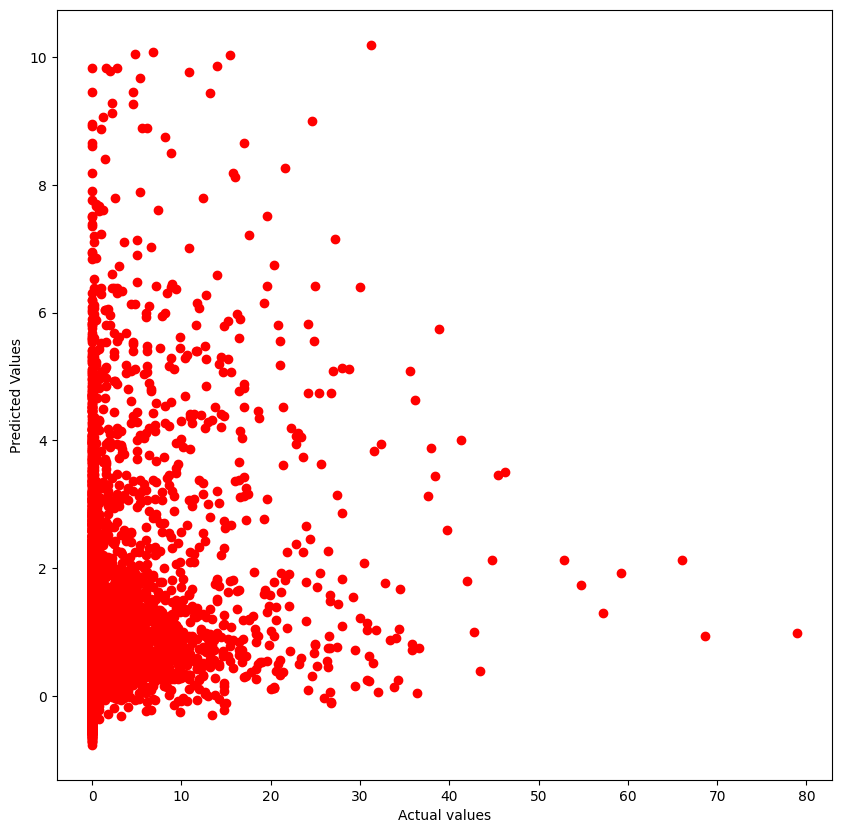

In [55]:
plt.style.use('default')
plt.figure(figsize=(10, 10))
plt.scatter(test_y, y_pred, c = 'red')
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')

In [56]:
# Evaluate model performance:

mae_test = mean_absolute_error(test_y, y_pred)
print("The test MAE is: ", round(mae_test, 2), "\n")
mse_test = mse(test_y, y_pred)
print("The test MSE is: ", round(mse_test, 2), "\n")
print('R2 score:', r2_score(test_y, y_pred), "\n")
rmse_test = np.sqrt(mse_test)
print("The test RMSE is: ", rmse_test)

The test MAE is:  0.65 

The test MSE is:  5.05 

R2 score: 0.09947884943649576 

The test RMSE is:  2.2473024511514117


In [57]:
# Evaluate model performance:

mae_test = mean_absolute_error(train_y, predictions_lr)
print("The training MAE is: ", round(mae_test, 2), "\n")
mse_test = mse(test_y, y_pred)
print("The training MSE is: ", round(mse_test, 2), "\n")
print('R2 score:', r2_score(train_y, predictions_lr), "\n")
rmse_test = np.sqrt(mse_test)
print("The training RMSE is: ", rmse_test)

The training MAE is:  0.67 

The training MSE is:  5.05 

R2 score: 0.09647552996491537 

The training RMSE is:  2.2473024511514117


## 2. Random Forest Regressor

## 2.1 Parameters are default

In [58]:
# Make a Random Forest Regressor model and train it:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(train_x, train_y)

RandomForestRegressor(random_state=42)

In [122]:
# save the model to disk
filename = 'RF.sav'
joblib.dump(forest_reg, filename)

['RF.sav']

In [123]:
# load the model from disk
loaded_model = joblib.load(filename)

#### Training and evaluation on the training set

In [188]:
# Make predictions:
predictions_forest = forest_reg.predict(train_x)
# Evaluate the model on the training set.
mae_training = mean_absolute_error(train_y, predictions_forest)
print("The training MAE is: ", round(mae_training, 2), "\n")
mse_training = mse(train_y, predictions_forest)
print("The training MSE is: ", round(mse_training, 2), "\n")
print('R2 score:', r2_score(train_y, predictions_forest), "\n")
print('RMSE:', np.sqrt(mse_training))

The training MAE is:  0.21 

The training MSE is:  0.87 

R2 score: 0.8545818990422661 

RMSE: 0.9319347646250888


#### Training and evaluation on the Test set

In [189]:
# Make predictions 
y_pred_t = forest_reg.predict(test_x)

# Evaluate model performance using MAE, MSE and RMSE:
mae_test = mean_absolute_error(test_y, y_pred_t)
print("The test MAE is: ", round(mae_test, 2), "\n")
mse_test = mse(test_y, y_pred_t)
print("The test MSE is: ", round(mse_test, 2), "\n")
print('R2 score:', r2_score(test_y, y_pred_t), "\n")
rmse_test = np.sqrt(mse_test)
print("The test RMSE is: ", rmse_test)

The test MAE is:  0.56 

The test MSE is:  3.9 

R2 score: 0.19534620161694827 

The test RMSE is:  1.9751606345066939


In [126]:
# Create a DataFrame to hold the true values of the test set and the model's predictions:
predictions = pd.DataFrame (
    zip(test_y, y_pred, test_y - y_pred),
    columns = ["test_y", "y_pred", "error"]
)

predictions.head(10)

,test_y,y_pred,error
0,0.0,0.143938,-0.143938
1,0.0,1.238430,-1.238430
2,0.0,0.088393,-0.088393
3,0.0,0.071518,-0.071518
4,0.2,0.291319,-0.091319
5,0.0,0.319228,-0.319228
6,0.0,0.243127,-0.243127
7,0.0,-0.095988,0.095988
8,0.0,-0.029743,0.029743
9,0.0,0.076813,-0.076813


Text(0, 0.5, 'Predicted Values')

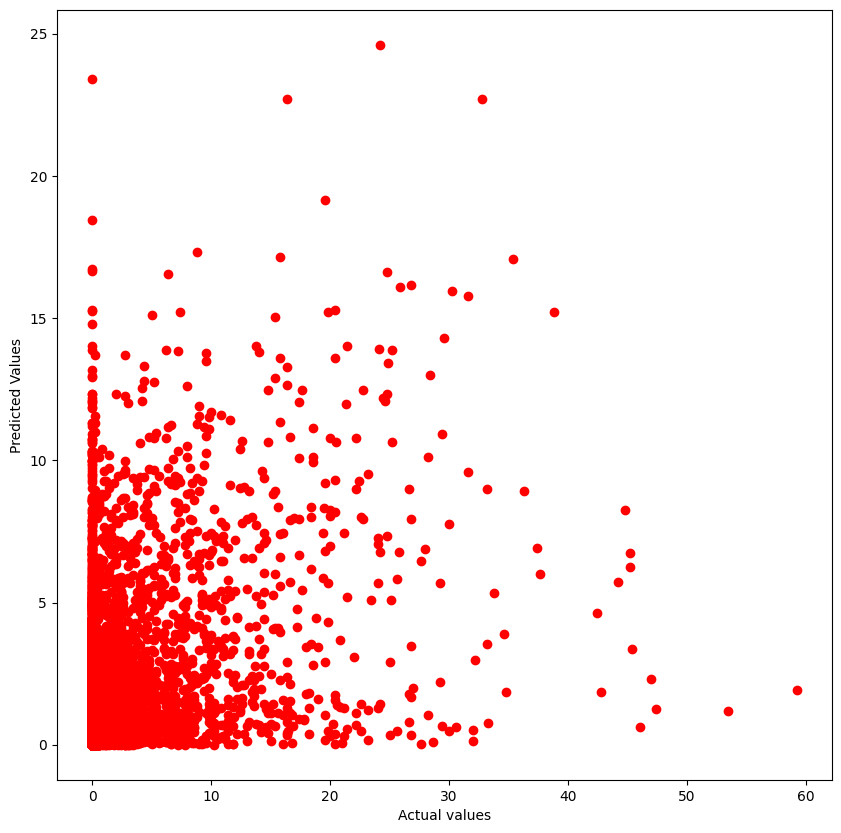

In [127]:
plt.style.use('default')
plt.figure(figsize=(10, 10))
plt.scatter(test_y, y_pred_t, c = 'red')
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')

## 2.2 Adjust parameters

In [128]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "n_estimators" : [20, 30, 40, 50, 100],
    "max_depth" : [8, 12, 16],
}
 
clf = GridSearchCV(forest_reg, parameters, n_jobs=-1)
clf.fit(train_x, train_y)    

GridSearchCV(estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [8, 12, 16],
                         'n_estimators': [20, 30, 40, 50, 100]})

In [129]:
# save the model to disk
filename2 = 'RFv2.sav'
joblib.dump(clf, filename2)

['RFv2.sav']

In [130]:
# load the model from disk
loaded_model_RFv2 = joblib.load(filename2)

In [214]:
# Make predictions using best hyperparameters:
y_pred_train = clf.predict(train_x)

# Evaluate model performance:
mae_training = mean_absolute_error(train_y, y_pred_train)
print("The training MAE is: ", round(mae_training, 2), "\n")
mse_test = mse(train_y, y_pred_train)
print("The training MSE is: ", round(mse_test, 2), "\n")
print('R2 score:', r2_score(train_y, y_pred_train), "\n")
rmse_training = np.sqrt(mse(train_y, y_pred_train))
print("The training RMSE is: ", rmse_training)

The training MAE is:  0.38 

The training MSE is:  1.97 

R2 score: 0.6707087095889184 

The training RMSE is:  1.402382231212662


#### Training and evaluation on the Test set

In [187]:
# Make predictions 
y_pred_test = clf.predict(test_x)

# Evaluate model performance:
mae_test = mean_absolute_error(test_y, y_pred_test)
print("The test MAE is: ", round(mae_test, 2), "\n")
mse_test = mse(test_y, y_pred_test)
print("The test MSE is: ", round(mse_test, 2), "\n")
print('R2 score:', r2_score(test_y, y_pred_test), "\n")
rmse_test = np.sqrt(mse_test)
print("The test RMSE is: ", rmse_test)

The test MAE is:  0.54 

The test MSE is:  3.94 

R2 score: 0.1883059175068389 

The test RMSE is:  1.9837826080716472


In [133]:
# Create a DataFrame to hold the true values of the test set and the model's predictions:
predictions = pd.DataFrame (
    zip(test_y, y_pred_test, test_y - y_pred_test),
    columns = ["test_y", "y_pred_test", "error"]
)

predictions.head(10)

,test_y,y_pred_test,error
0,0.0,0.004661,-0.004661
1,0.0,0.725613,-0.725613
2,0.0,0.020035,-0.020035
3,0.0,0.001844,-0.001844
4,0.2,0.311494,-0.111494
5,0.0,0.354569,-0.354569
6,0.0,0.017401,-0.017401
7,0.0,0.000179,-0.000179
8,0.0,0.000350,-0.000350
9,0.0,0.269229,-0.269229


Text(0, 0.5, 'Predicted Values')

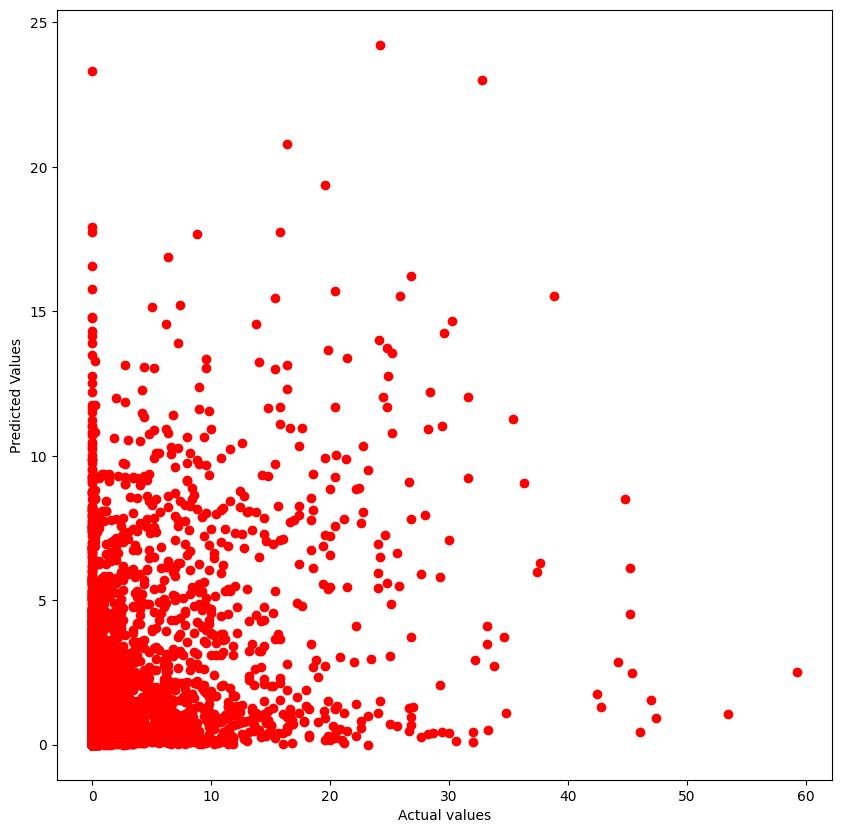

In [134]:
plt.style.use('default')
plt.figure(figsize=(10, 10))
plt.scatter(test_y, y_pred_test, c = 'red')
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')

### 3. LSTM

### Train, Validation Data

<AxesSubplot: >

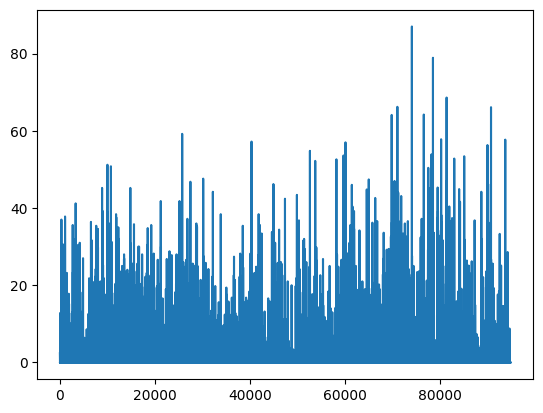

In [135]:
poll = data['value']
poll.plot()

### Split the dataframe into X and y

In [136]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)

In [137]:
WINDOW_SIZE=5
X, y = df_to_X_y(poll, WINDOW_SIZE)
X.shape, y.shape

((180513, 5, 1), (180513,))

In [138]:
X_train, y_train = X[:140000], y[:140000]
X_val, y_val = X[140000:], y[140000:650000]

In [153]:
X_train.shape, X_val.shape, y_train.shape

((140000, 5, 1), (40513, 5, 1), (140000,))

### Create a basic LSTM model

In [161]:
# model = Sequential()
# model.add(InputLayer((5,1)))
# model.add(LSTM(64))
# # model.add(LSTM(64))
# model.add(Dense(64, 'relu'))
# model.add(Dense(10, 'linear'))
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(5, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 5, 50)             10400     
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


### Create a checkpoint and compile

In [162]:
cp = ModelCheckpoint('LSTM/', save_best_only=True)
model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [163]:
model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=10, verbose=1, callbacks=[cp])

Epoch 1/10
4374/4375 [============================>.] - ETA: 0s - loss: 4.3504 - root_mean_squared_error: 2.0858

INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


4375/4375 [==============================] - 71s 15ms/step - loss: 4.3497 - root_mean_squared_error: 2.0856 - val_loss: 5.4509 - val_root_mean_squared_error: 2.3347
Epoch 2/10
4375/4375 [==============================] - ETA: 0s - loss: 3.9031 - root_mean_squared_error: 1.9756

INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


4375/4375 [==============================] - 71s 16ms/step - loss: 3.9031 - root_mean_squared_error: 1.9756 - val_loss: 5.3448 - val_root_mean_squared_error: 2.3119
Epoch 3/10
4374/4375 [============================>.] - ETA: 0s - loss: 3.8345 - root_mean_squared_error: 1.9582

INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


4375/4375 [==============================] - 72s 16ms/step - loss: 3.8336 - root_mean_squared_error: 1.9580 - val_loss: 5.3138 - val_root_mean_squared_error: 2.3052
Epoch 4/10
4371/4375 [============================>.] - ETA: 0s - loss: 3.8173 - root_mean_squared_error: 1.9538

INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


4375/4375 [==============================] - 76s 17ms/step - loss: 3.8175 - root_mean_squared_error: 1.9538 - val_loss: 5.2868 - val_root_mean_squared_error: 2.2993
Epoch 5/10
4375/4375 [==============================] - 70s 16ms/step - loss: 3.7933 - root_mean_squared_error: 1.9476 - val_loss: 5.3111 - val_root_mean_squared_error: 2.3046
Epoch 6/10
4375/4375 [==============================] - ETA: 0s - loss: 3.7824 - root_mean_squared_error: 1.9448

INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


4375/4375 [==============================] - 78s 18ms/step - loss: 3.7824 - root_mean_squared_error: 1.9448 - val_loss: 5.2850 - val_root_mean_squared_error: 2.2989
Epoch 7/10
4375/4375 [==============================] - 73s 17ms/step - loss: 3.7745 - root_mean_squared_error: 1.9428 - val_loss: 5.2869 - val_root_mean_squared_error: 2.2993
Epoch 8/10
4375/4375 [==============================] - 69s 16ms/step - loss: 3.7590 - root_mean_squared_error: 1.9388 - val_loss: 5.3584 - val_root_mean_squared_error: 2.3148
Epoch 9/10
4371/4375 [============================>.] - ETA: 0s - loss: 3.7604 - root_mean_squared_error: 1.9392

INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


4375/4375 [==============================] - 82s 19ms/step - loss: 3.7579 - root_mean_squared_error: 1.9385 - val_loss: 5.2845 - val_root_mean_squared_error: 2.2988
Epoch 10/10
4375/4375 [==============================] - 73s 17ms/step - loss: 3.7339 - root_mean_squared_error: 1.9323 - val_loss: 5.2992 - val_root_mean_squared_error: 2.3020


### Predictions vs Actual Training data

In [164]:
model = load_model('LSTM/')
train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions,
                                  'Actual':y_train})
train_results.head()

4375/4375 [==============================] - 28s 6ms/step


,Train Predictions,Actual
0,0.191034,0.0
1,0.096600,0.0
2,0.096600,0.6
3,0.512007,0.0
4,0.241344,0.0


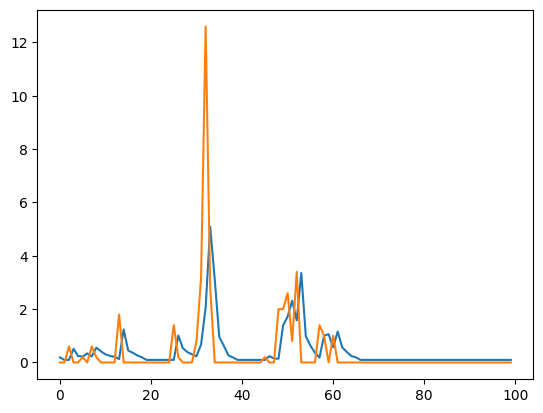

In [165]:
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Actual'][:100])

In [215]:
# rmse = np.sqrt(mse(y_train, train_predictions))
# print("Validation RMSE ="  ,rmse)

# Evaluate model performance:
mae_test = mean_absolute_error(y_train, train_predictions)
print("The training MAE is: ", round(mae_test, 2), "\n")
mse_test = mse(y_train, train_predictions)
print("The training MSE is: ", round(mse_test, 2), "\n")
print('R2 score:', r2_score(y_train, train_predictions), "\n")
rmse_test = np.sqrt(mse_test)
print("The training RMSE is: ", rmse_test)

The training MAE is:  0.46 

The training MSE is:  3.72 

R2 score: 0.32471449948695863 

The training RMSE is:  1.929954787087298


### Predictions vs Actual Validation data

In [167]:
val_predictions = model.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions': val_predictions,
                                  'Actual':y_val})
val_results.head()

1267/1267 [==============================] - 9s 6ms/step


,Val Predictions,Actual
0,0.0966,0.0
1,0.0966,0.0
2,0.0966,0.0
3,0.0966,0.0
4,0.0966,0.0


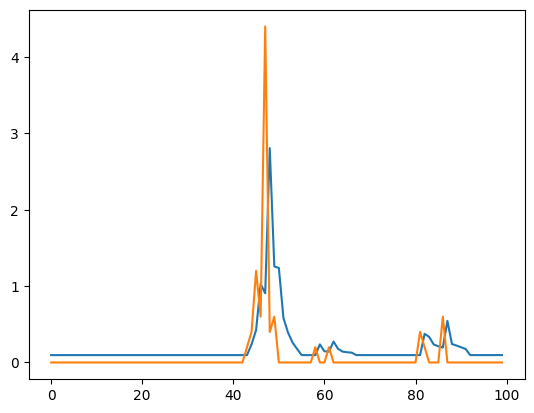

In [168]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actual'][:100])

In [192]:
# rmse = np.sqrt(mse(y_val, val_predictions))
# print("Validation RMSE ="  ,rmse)

mae_test = mean_absolute_error(y_val, val_predictions)
print("The test MAE is: ", round(mae_test, 2), "\n")
mse_test = mse(y_val, val_predictions)
print("The test MSE is: ", round(mse_test, 2), "\n")
print('R2 score:', r2_score(y_val, val_predictions), "\n")
rmse_test = np.sqrt(mse_test)
print("The test RMSE is: ", rmse_test)

The test MAE is:  0.52 

The test MSE is:  5.28 

R2 score: 0.19318704485687344 

The test RMSE is:  2.2987985969581275
